## import the necessary python packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

## load data

In [2]:
df = pd.read_csv("./data.csv")

### show the first 5 samples

In [3]:
df.head(5)

,Solids_Reduction,Reduction_in_Oxygen_Demand
0,3,5
1,7,11
2,11,21
3,15,16
4,18,16


In [4]:
df

,Solids_Reduction,Reduction_in_Oxygen_Demand
0,3,5
1,7,11
2,11,21
3,15,16
4,18,16
5,27,28
6,29,27
7,30,25
8,30,35
9,31,30


## 1. Workflow 

### 1.1 get independent (X) and dependent variables (Y)

In [5]:
X = df[["Solids_Reduction"]].values
y = df[["Reduction_in_Oxygen_Demand"]].values

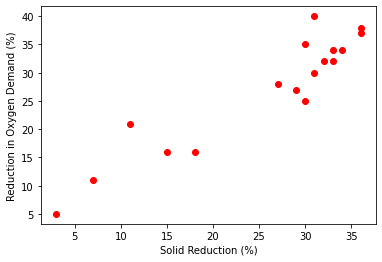

In [6]:
plt.scatter(X,y,c="red")
plt.xlabel("Solid Reduction (%)")
plt.ylabel("Reduction in Oxygen Demand (%)")
plt.show()

### 1.2 create an linear regression object, then train the model

In [7]:
regr = linear_model.LinearRegression()
regr.fit(X,y)
print("We have trained a linear model!")

We have trained a linear model!


#### show the parameters

In [8]:
beta_0 = regr.intercept_.item()
print("beta_0 (intercept) is:", beta_0)

beta_0 (intercept) is: 4.241692439297228


In [9]:
beta_1 = regr.coef_.item()
print("beta_1 (slope) is:", beta_1)

beta_1 (slope) is: 0.8919523590182272


### 1.3 apply the model

#### 1.3.1 based on parameters

In [10]:
y_hat_equation = beta_0 + beta_1*X

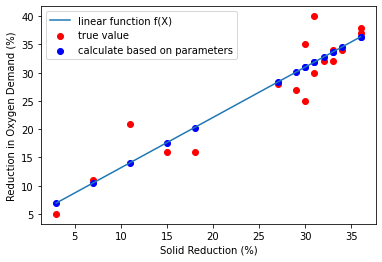

In [11]:
plt.scatter(X,y,c="red",label="true value")
plt.scatter(X,y_hat_equation,c="blue",label="calculate based on parameters")
plt.plot([X[0],X[-1]],[y_hat_equation[0],y_hat_equation[-1]],label="linear function f(X)")
plt.xlabel("Solid Reduction (%)")
plt.ylabel("Reduction in Oxygen Demand (%)")
plt.legend()
plt.show()

#### 1.3.2 use the method "predict"

In [12]:
y_hat = regr.predict(X)

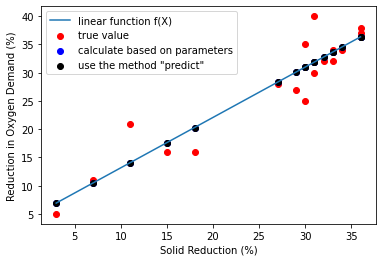

In [13]:
plt.scatter(X, y, c="red", label="true value")
plt.scatter(X, y_hat_equation, c="blue", label="calculate based on parameters")
plt.plot([X[0],X[-1]],[y_hat_equation[0],y_hat_equation[-1]], label="linear function f(X)")

plt.scatter(X, y_hat, c="black", label='use the method "predict"')

plt.xlabel("Solid Reduction (%)")
plt.ylabel("Reduction in Oxygen Demand (%)")
plt.legend()
plt.show()

### 1.4 model evaluation

In [14]:
print("root-mean-square-error:", mean_squared_error(y_true=y, y_pred=y_hat, squared=False))
print("r2:", r2_score(y_true=y, y_pred=y_hat))

root-mean-square-error: 3.52606289504984
r2: 0.8706282297466746


## 2. If we don't have an independent testing dataset

### 2.1 split the whole data into training and testing data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=520)

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
print("We have trained a linear model!")

We have trained a linear model!


### 2.2 training results

In [16]:
y_pred = regr.predict(X_train)
print("root mean square error:", mean_squared_error(y_true=y_train, y_pred=y_pred, squared=False))
print("r2:", r2_score(y_true=y_train, y_pred=y_pred))

root mean square error: 3.5752779560467345
r2: 0.8681643276489738


### 2.3  testing results

In [17]:
y_pred = regr.predict(X_test)
print("root mean square error:", mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False))
print("r2:", r2_score(y_true=y_test, y_pred=y_pred))

root mean square error: 4.034353685962457
r2: 0.8117775946406043


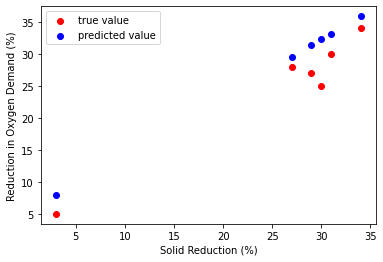

In [18]:
plt.scatter(X_test, y_test, c="red", label="true value")
plt.scatter(X_test, y_pred, c="blue", label="predicted value")

plt.xlabel("Solid Reduction (%)")
plt.ylabel("Reduction in Oxygen Demand (%)")
plt.legend()
plt.show()